Prepare dataset to use detectron2 models

In [4]:
import json
import numpy as np 
from pycocotools import mask
from skimage import measure 
import os 
import os.path as osp
import cv2

WORKING_DIR = '/home/ntphat/projects/medico/medico'
DATA_DIR = 'data'
MASK_DIR = 'data/dfs_masks'
IMAGE_DIR = 'data/images'

os.chdir(WORKING_DIR)

sample_name = 'cju0qkwl35piu0993l0dewei2'
sample_mask = osp.join(MASK_DIR, f'{sample_name}.jpg')
sample_img = osp.join(IMAGE_DIR, f'{sample_name}.jpg')

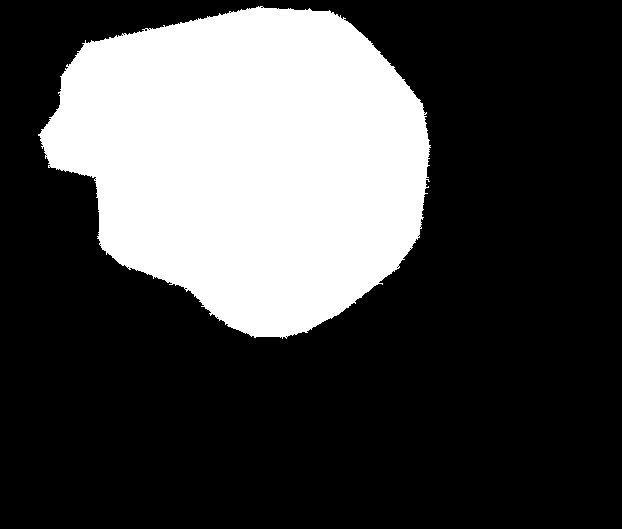

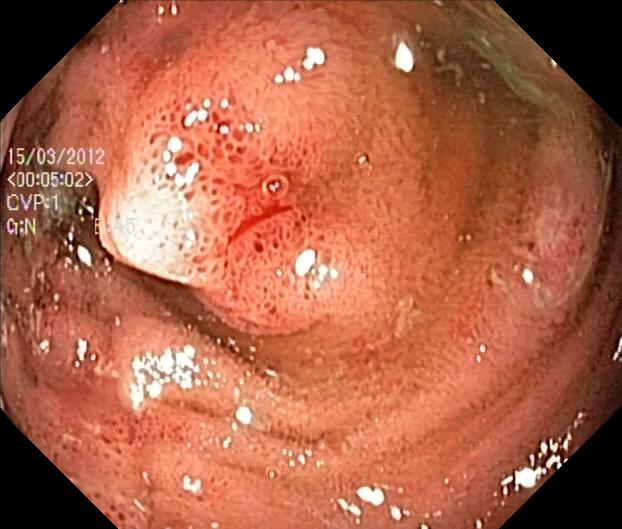

In [2]:
from PIL import Image

mask = Image.open(sample_mask)
display(mask)
img = Image.open(sample_img)
display(img)

In [4]:
img.getbands()

('R', 'G', 'B')

22
(2, 1, 2)


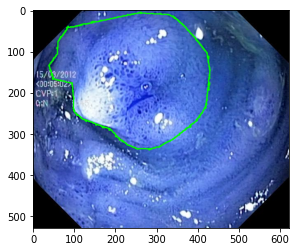

In [67]:
import cv2
import matplotlib.pyplot as plt

cv_img = cv2.imread(sample_img)
cv_mask = cv2.imread(sample_mask)
cv_mask = cv2.cvtColor(cv_mask, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(cv_mask, 80, 180)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
print(len(contours))
print(contours[2].shape)

cv2.drawContours(cv_img, contours, -1, (0, 255, 0, 0), 2)
plt.imshow(cv_img)


In [70]:
polygons = []
for contour in contours:
    contour = np.squeeze(contour, axis=1)
    list_point = contour.tolist()
    print(len(list_point))
    print(list_point)
    poly = Polygon(contour.tolist())
    poly_inside = np.array(poly.exterior.coords).ravel().tolist()
    print(len(poly_inside))
    polygons.append(poly)
    

209
420
42
86
2


ValueError: A LinearRing must have at least 3 coordinate tuples

In [11]:
def create_sub_masks(mask_image):
    H, W = mask_image.shape[:2]
    sub_masks = {}
    
    for y in range(H):
        for x in range(W):
            pixel = mask_image[y, x, :]
            if pixel != (0,0,0):
                pixel_str = str(pixel)
                if sub_masks.get(pixel_str) is None:
                    sub_masks[pixel_str] = Image.new('1', (W+2, H+2))
                sub_masks[pixel_str].put_pixel((x+1, y+1), 1)
    return sub_masks

In [79]:
import numpy as np 
from skimage import measure
from shapely.geometry import Polygon, MultiPolygon

def create_coco_mask_annotation(mask):
    '''
    Find contours around each sub-mask
    Args:
        mask: cv2 numpy gray image
    '''
    height, width = mask.shape[:2]
    edged = cv2.Canny(mask, 30, 200)
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    segmentations = []
    area = 0.0
    for y in range(height):
        for x in range(width):
            if mask[y, x] == 255.0:
                segmentations.append(float(x))
                segmentations.append(float(y))            
                area += 1.0
    
    return segmentations, area

In [5]:
np_mask = cv2.imread(sample_mask)
np_mask = cv2.cvtColor(np_mask, cv2.COLOR_BGR2GRAY) 
cv_img = cv2.imread(sample_img)

In [7]:
import pycocotools.mask as mask

seg = mask.encode(np.asfortranarray(np_mask))
print(type(seg))

<class 'dict'>


In [8]:
seg

{'size': [529, 622],
 'counts': b'Pe`011011Y`0Of_O010O]`00c_OZ`00f_O011W`0Oh_O00000Y`00g_O00000Y`00g_O10O00[`01e_OO0R`00n_O010O10O30M002000N030M000]?0c@10O020N0000000000000000031W?Oi@0M0010O0020N01010O0O00000\\?0h@0L10O10O000020N0001010N0Y?0g@023NN0O010O00000020N000_?0b@004OL0020N030M030M01\\?Od@030N0O110OO00020O000O1Y?Og@000050K0010O20N50M0N00R?0o@1OO11OR10mN00000j>0VA0000000U10lN0O00h>0XA0000000010O00Q11oNO0m>0TA030m00oN00001h>0XAO000010O010o00QO01k>OUAO001000Q10oN0O0h>0XA30N0O000Q10PO0O2h>NXA00031NOQ11nNO000b=0aB041I1;NE000i10ZN0V=1gB019OH070G1j1OVN1000W=1hBO01060I0010O:0F00j10VN01[=0PCOF0O00070I010O0g10YN010O0X=1iBO:0E000080H000k10UN0_=0aB<0E090F10Oi10WN020V=0hB10O080I0O0;0G0f10YN0O\\=1dBO0;0E0:0F1000h12WNN0i<0YC0N00010O00P30PM20j<0UC020N0o20PM000k<0UC00030M0000R30nL10h<0ZC0N0O0020n20PM000k<0VC2OO2ON0o20RM0O01h<0XCO10O1010o20PM1Oj<0UC020N0020o20oL0000h<0YC004OM0o20QM0O00c<0]C030M11OV30iL0000b<0^C000000010O00Y30hL000b<0^C010N0]30cL00b<0^C00000010O0Z30gL0Oc<0`C0M01010U31kLONc<0]C030O

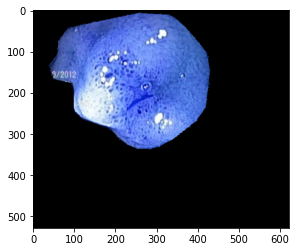

In [76]:
for c in range(cv_img.shape[-1]):
    cv_img[:, :, c] = cv_img[:, :, c].astype(np.float)* np_mask

plt.imshow(cv_img)

In [81]:
segmentations, area = create_mask_annotation(np_mask)
print(len(segmentations))

183192


In [2]:
import os.path as osp
annot = json.load(open(osp.join(DATA_DIR, 'coco_annotation.json'), 'r'))

In [3]:
print(annot.keys())

dict_keys(['annotations', 'categories', 'images', 'info', 'licenses'])


In [10]:
len(annot['annotations'][0]['segmentation'][0])

183192

In [12]:
annot['annotations'][0]['area']

91596.0